## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [223]:
import warnings
warnings.filterwarnings('ignore')

In [224]:
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score, classification_report, precision_score, recall_score


## Exploratory data analysis

In [225]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [226]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [227]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

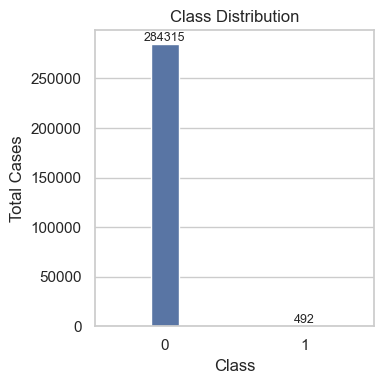

In [228]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(4,4))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Class', data=df, width=0.2)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.1, p.get_height() + 1, ), fontsize=9, rotation = 0, ha="center" , va="bottom")
# plt.xticks((0, 1), ('Normal', 'Fraud'))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


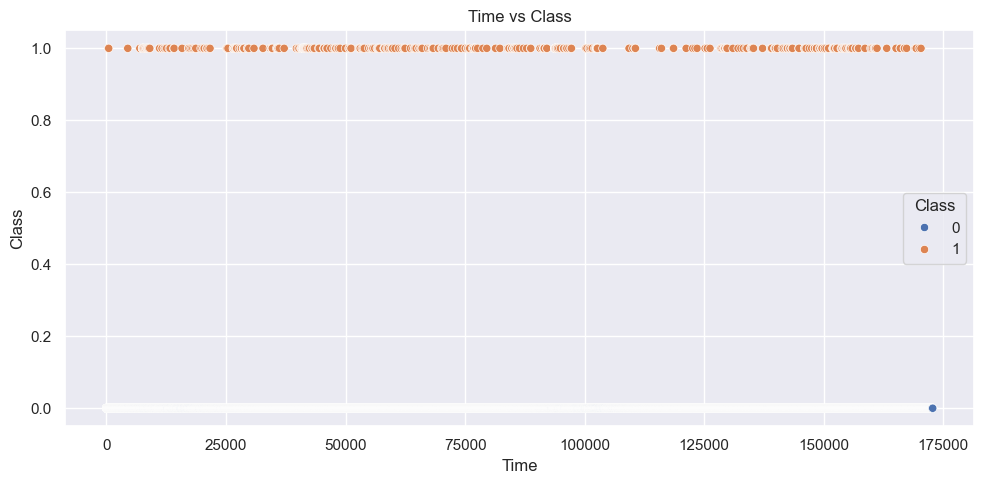

In [229]:
# Create a scatter plot to observe the distribution of classes with time

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.scatterplot(x='Time', y='Class', data=df, hue='Class')
plt.title('Time vs Class')
plt.tight_layout()
plt.show()


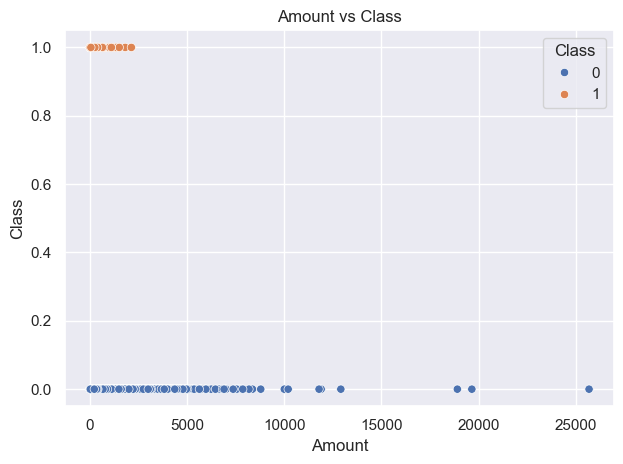

In [230]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure()
sns.set_theme(style="darkgrid")
sns.scatterplot(x='Amount', y='Class', data=df, hue='Class')
plt.title('Amount vs Class')
plt.tight_layout()
plt.show()

In [231]:
# Drop unnecessary columns
df = df.drop(['Time'], axis=1)

### Splitting the data into train & test data

In [232]:
y= df.pop('Class')

In [233]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [234]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

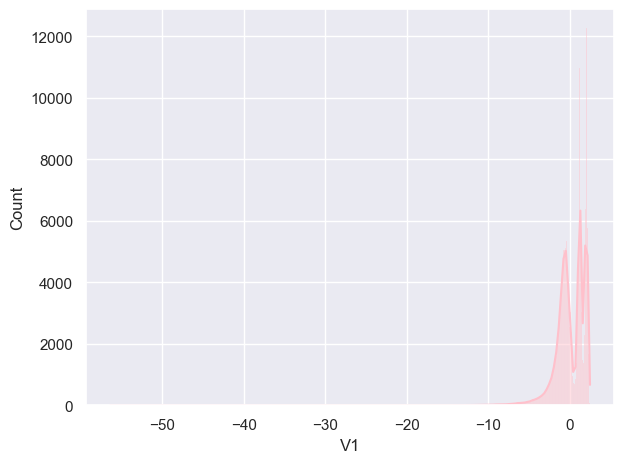

In [235]:
# plot the histogram of a variable from the dataset to see the skewness

for col_name in X_train.columns:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.histplot(X_train[col_name], kde=True, color='pink')
    plt.tight_layout()
    plt.show()
    break

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [236]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt.fit_transform(X_train)

In [237]:
data_transformed[0][1]

np.float64(-0.32549737862979433)

In [238]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness



## Model Building
- Build different models on the imbalanced dataset and see the result

In [239]:
metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'PRAUC Score', 'Time Taken(s)'])

In [240]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

num_C = 0.001
cv_num = 5

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [241]:
metrics_df

,Model,Precision,Recall,PRAUC Score,Time Taken(s)


In [242]:
#perform cross validation

clf = LogisticRegression(C=num_C, class_weight='balanced')
cv = model_selection.StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=42)
start_time = time.time()
cv_results = model_selection.cross_validate(clf, data_transformed, y_train, cv=cv, scoring=['precision', 'recall', 'average_precision'])
print(f"Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f}")
print(f"PRAUC Score: {cv_results['test_average_precision'].mean():.4f}")

metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['LogisticRegression'], 
            'Precision': [cv_results['test_precision'].mean()], 
            'Recall': [cv_results['test_recall'].mean()], 
            'PRAUC Score': [cv_results['test_average_precision'].mean()],
            'Time Taken(s)': [time.time() - start_time]
        }
    )
    ], 
    ignore_index=True
) 

Precision: 0.0713
Recall: 0.9062
PRAUC Score: 0.7481


In [243]:
#perform hyperparameter tuning

start_time = time.time()
param_grid = [
    {'penalty':['l1','l2'],
    'C' : np.logspace(-1,1,5),
    'solver': ['lbfgs','newton-cg','liblinear'],
    'max_iter'  : [100,1000,2500,5000]
}
]

lr = LogisticRegression()
gcv = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_gcv = gcv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
#print the optimum value of hyperparameters

print(f"Best Parameters: {best_gcv.best_params_}, Best Score: {best_gcv.best_score_}")

# make prediction on test data and check accuracy score on test data

y_pred = best_gcv.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
pr_auc_score = average_precision_score(y_test, y_pred)

# emit the metrics into dataframe

metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['LogisticRegression with HPT'], 
            'Precision': [precision], 
            'Recall': [recall], 
            'PRAUC Score': [pr_auc_score],
            'Time Taken(s)': [time.time() - start_time]
        }
    )
    ], 
    ignore_index=True
)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Parameters: {'C': np.float64(10.0), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}, Best Score: 0.9992407119644892


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [244]:
# define a function to train a model. capture accuracy score, average precision score and time taken

def base_model_trainer(X_train, y_train, X_test, y_test, clf, name):
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    pr_auc_score = average_precision_score(y_test, y_pred)
    print(f"Model: {name}, Precision: {precision}, Recall: {recall}, PRAUC Score: {pr_auc_score}, Time Taken(s): {int(time.time()-start_time)}" )
    return name, precision, recall, pr_auc_score, int(time.time()-start_time)

    

In [ ]:
# hashmap the models

model_dict = {
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Decision Tree" : DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest" : RandomForestClassifier(class_weight='balanced'),
    "XGBoost" : XGBClassifier(scale_pos_weight=1, seed=42),
    # "SVM" : SVC(class_weight='balanced', probability=True)
}

In [246]:
# Train models using the base models and capture the metrics in pandas dataframe

for model_name, clf in model_dict.items():
    name, precision, recall, pr_auc_score, timetaken = base_model_trainer(X_train, y_train, X_test, y_test, clf, model_name)
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': [name], 'Precision': [precision], 'Recall': [recall], 'PRAUC Score': [pr_auc_score], 'Time Taken(s)': [timetaken]})], ignore_index=True)


Model: KNN, Precision: 0.96875, Recall: 0.6326530612244898, PRAUC Score: 0.6135146533421136, Time Taken(s): 4
Model: Decision Tree, Precision: 0.75, Recall: 0.7040816326530612, PRAUC Score: 0.5285703358271788, Time Taken(s): 6
Model: Random Forest, Precision: 0.9866666666666667, Recall: 0.7551020408163265, PRAUC Score: 0.7454553471260349, Time Taken(s): 65
Model: XGBoost, Precision: 0.9285714285714286, Recall: 0.7959183673469388, PRAUC Score: 0.7394181666607467, Time Taken(s): 0
Model: SVM, Precision: 0.08959835221421215, Recall: 0.8877551020408163, PRAUC Score: 0.07973450550955521, Time Taken(s): 3887


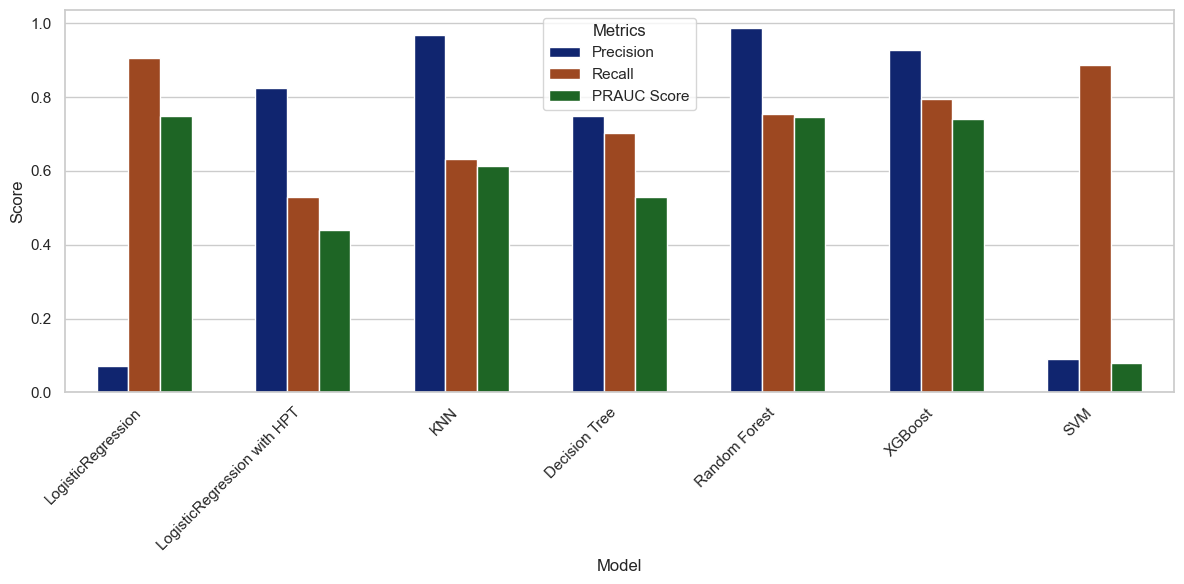

In [247]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.set_palette('dark')

# Melt the dataframe to long format
metrics_melted = metrics_df.melt(id_vars=['Model'], 
                                value_vars=['Precision', 'Recall', 'PRAUC Score'],
                                var_name='Metric', value_name='Score')

# Create grouped bar plot
ax = sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', width=0.6)

plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


#### Observations

In this project, the objective is to train a model that can detect fraudulent transactions. Hence, Recall in conjunction with precision becomes an utmost significant metric for model evaluation. Alongside, we are capturing Area under Precision-Recall curve that assists in model evaulation when datasets are imbalanced, like ours.

Precision: Helps to detect predicted frauds that are actual frauds
Recall: Helps to detect the actual frauds
ROC AUC: Helps to understand the model's ability to distinguish between actual frauds and non-frauds

There is another attribute under consideration is the speed of the model to train and predict. This is important because it can help us understand how much time our model takes to train and predict. This can be useful for optimizing the model's performance and for understanding how much time it takes to train and predict on new data.

Basis the above context and significant points, XGBoost model appears to have performed well. It is extremely fast and has the highest recall and PRAUC. 

In such a use case, it would be better to suspect slightly more transactions then missing out on actual frauds.

In [248]:
metrics_df.head()

,Model,Precision,Recall,PRAUC Score,Time Taken(s)
0,LogisticRegression,0.071258,0.906167,0.748130,0.816810
1,LogisticRegression with HPT,0.825397,0.530612,0.438773,157.827828
2,KNN,0.968750,0.632653,0.613515,4.000000
3,Decision Tree,0.750000,0.704082,0.528570,6.000000
4,Random Forest,0.986667,0.755102,0.745455,65.000000


In [1]:

def train_model_hpt(model, param_grid, X_train, y_train, X_test, y_test, name):
    start_time = time.time()
    clf = RandomizedSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1 , verbose=3)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    pr_auc_score = average_precision_score(y_test, y_pred)
    print(f"Model: {model}, Precision: {precision}, Recall: {recall}, PRAUC Score: {pr_auc_score}, Time Taken(s): {int(time.time()-start_time)}")
    return model, precision, recall, pr_auc_score, int(time.time()-start_time), best_params

In [250]:
"""
# Train the KNN model by using hyperparameter tuning


# Define the hyperparameter grid

start_time = time.time()



knn_hpt = KNeighborsClassifier()
knn_hpt = GridSearchCV(knn_hpt, param_grid, cv=5, scoring='recall', n_jobs=-1)
knn_hpt.fit(X_train, y_train)
print(knn_hpt.best_params_)

# predict on test data and check evaluation metrics precision, recall and prauc
y_pred = knn_hpt.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
pr_auc_score = average_precision_score(y_test, y_pred)

# emit the metrics into dataframe
metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['KNN with HPT'],
            'Precision': [precision],
            'Recall': [recall],
            'PRAUC Score': [pr_auc_score],
            'Time Taken(s)': [time.time() - start_time]
        }
    )
    ],
    ignore_index=True
)
"""

"\n# Train the KNN model by using hyperparameter tuning\n\n\n# Define the hyperparameter grid\n\nstart_time = time.time()\n\n\n\nknn_hpt = KNeighborsClassifier()\nknn_hpt = GridSearchCV(knn_hpt, param_grid, cv=5, scoring='recall', n_jobs=-1)\nknn_hpt.fit(X_train, y_train)\nprint(knn_hpt.best_params_)\n\n# predict on test data and check evaluation metrics precision, recall and prauc\ny_pred = knn_hpt.predict(X_test)\nprecision = precision_score(y_test, y_pred)\nrecall = recall_score(y_test, y_pred)\npr_auc_score = average_precision_score(y_test, y_pred)\n\n# emit the metrics into dataframe\nmetrics_df = pd.concat(\n    [metrics_df,\n    pd.DataFrame(\n        {\n            'Model' : ['KNN with HPT'],\n            'Precision': [precision],\n            'Recall': [recall],\n            'PRAUC Score': [pr_auc_score],\n            'Time Taken(s)': [time.time() - start_time]\n        }\n    )\n    ],\n    ignore_index=True\n)\n"

In [279]:
# Train the KNN model by using hyperparameter tuning

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto']
}

knn_hpt = KNeighborsClassifier()

model, precision, recall, pr_auc_score, timetaken , knn_best_params = train_model_hpt(knn_hpt, param_grid, X_train, y_train, X_test, y_test, 'KNN with HPT')
print(f"Best parameters for KNN are {knn_best_params}")

# emit the metrics into dataframe
metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['KNN with HPT'],
            'Precision': [precision],
            'Recall': [recall],
            'PRAUC Score': [pr_auc_score],
            'Time Taken(s)': [time.time() - start_time]
        }
    )
    ],
    ignore_index=True
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.633 total time=  26.3s
[CV 2/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.633 total time=  26.3s
[CV 4/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.633 total time=  26.3s
[CV 1/5] END algorithm=auto, n_neighbors=9, weights=uniform;, score=0.641 total time=  26.4s
[CV 1/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.731 total time=  26.7s
[CV 2/5] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.481 total time=  26.7s
[CV 3/5] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.532 total time=  26.7s
[CV 1/5] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.603 total time=  26.8s
[CV 5/5] END algorithm=auto, n_neighbors=5, weights=distance;, score=0.722 total time=  26.9s
[CV 4/5] END algorithm=auto, n_neighbors=13, weights=uniform;, score=0.570 total time=  26.9s


In [280]:
# train the decision tree model with hyperparater tuning

param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_hpt = DecisionTreeClassifier()

model, precision, recall, pr_auc_score, timetaken , dt_best_params = train_model_hpt(dt_hpt, param_grid, X_train, y_train, X_test, y_test, 'DecisionTree with HPT')
print(f"Best parameters for DT are: {dt_best_params}")

# emit the metrics into dataframe
metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['DecisionTree with HPT'],
            'Precision': [precision],
            'Recall': [recall],
            'PRAUC Score': [pr_auc_score],
            'Time Taken(s)': [time.time() - start_time]
        }
    )
    ],
    ignore_index=True
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.671 total time=   2.4s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.658 total time=   2.4s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.759 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.722 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.731 total time=   2.6s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10;, score=0.756 total time=   3.9s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10;, score=0.734 total time=   4.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=10;, score=0.759 total time=   4.0s
[CV 3/5] END cri

In [282]:
# train the random forest model by hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
rf_hpt = RandomForestClassifier()

model, precision, recall, pr_auc_score, timetaken, rf_best_params  = train_model_hpt(rf_hpt, param_grid, X_train, y_train, X_test, y_test, 'RandomForest with HPT')
print(f"Best parameters for RF are : {rf_best_params}")

# emit the metrics into dataframe
metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['RandomForest with HPT'],
            'Precision': [precision],
            'Recall': [recall],
            'PRAUC Score': [pr_auc_score],
            'Time Taken(s)': [timetaken]
        }
    )
    ],
    ignore_index=True
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.772 total time=  48.6s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.769 total time=  48.7s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.696 total time=  48.8s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.722 total time=  49.1s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.823 total time=  49.2s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.795 total time= 1.6min
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.833 total time= 2.8min
[CV

In [281]:
# train the XGBoost model by hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

xgb_hpt = XGBClassifier()

model, precision, recall, pr_auc_score, timetaken, xgb_best_params = train_model_hpt(xgb_hpt, param_grid, X_train, y_train, X_test, y_test, 'XGBoost with HPT')
print(f"Best parameters for XGBoost are: {xgb_best_params}")

# emit the metrics into dataframe
metrics_df = pd.concat(
    [metrics_df,
    pd.DataFrame(
        {
            'Model' : ['XGBoost with HPT'],
            'Precision': [precision],
            'Recall': [recall],
            'PRAUC Score': [pr_auc_score],
            'Time Taken(s)': [timetaken]
        }
    )
    ],
    ignore_index=True
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.7;, score=0.821 total time=   1.6s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=13, n_estimators=50, subsample=0.5;, score=0.772 total time=   1.7s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=13, n_estimators=50, subsample=0.5;, score=0.722 total time=   1.8s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=13, n_estimators=50, subsample=0.5;, score=0.709 total time=   1.8s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=13, n_estimators=50, subsample=0.5;, score=0.795 total time=   1.9s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=13, n_estimators=50, subsample=0.5;, score=0.772 total time=   1.9s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=13, n_estimators=100, subsample=0.5;, score=0.722 total time=   2.8s
[CV 1/5] END co

In [285]:
xgb_best_params

{'subsample': 0.5,
 'n_estimators': 200,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

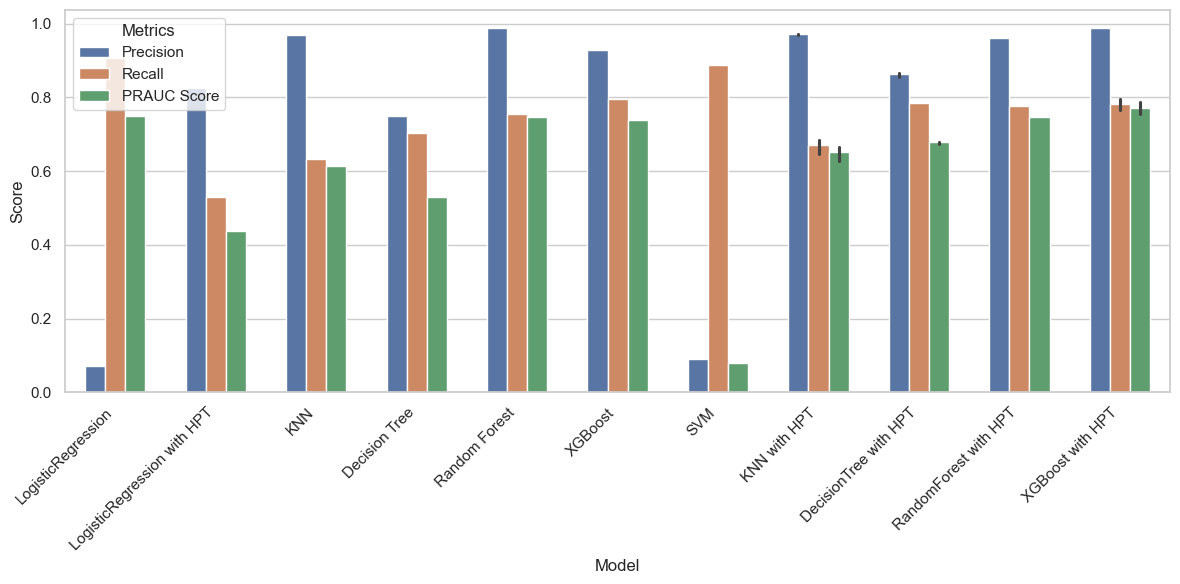

In [283]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.set_palette('deep')

# Melt the dataframe to long format
metrics_melted = metrics_df.melt(id_vars=['Model'], 
                                value_vars=['Precision', 'Recall', 'PRAUC Score'],
                                var_name='Metric', value_name='Score')

# Create grouped bar plot
ax = sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', width=0.6)

plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


In [286]:
clf = XGBClassifier(**xgb_best_params)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))  #print the evaluation score on the X_test by choosing the best evaluation metric

0.9995786664794073


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


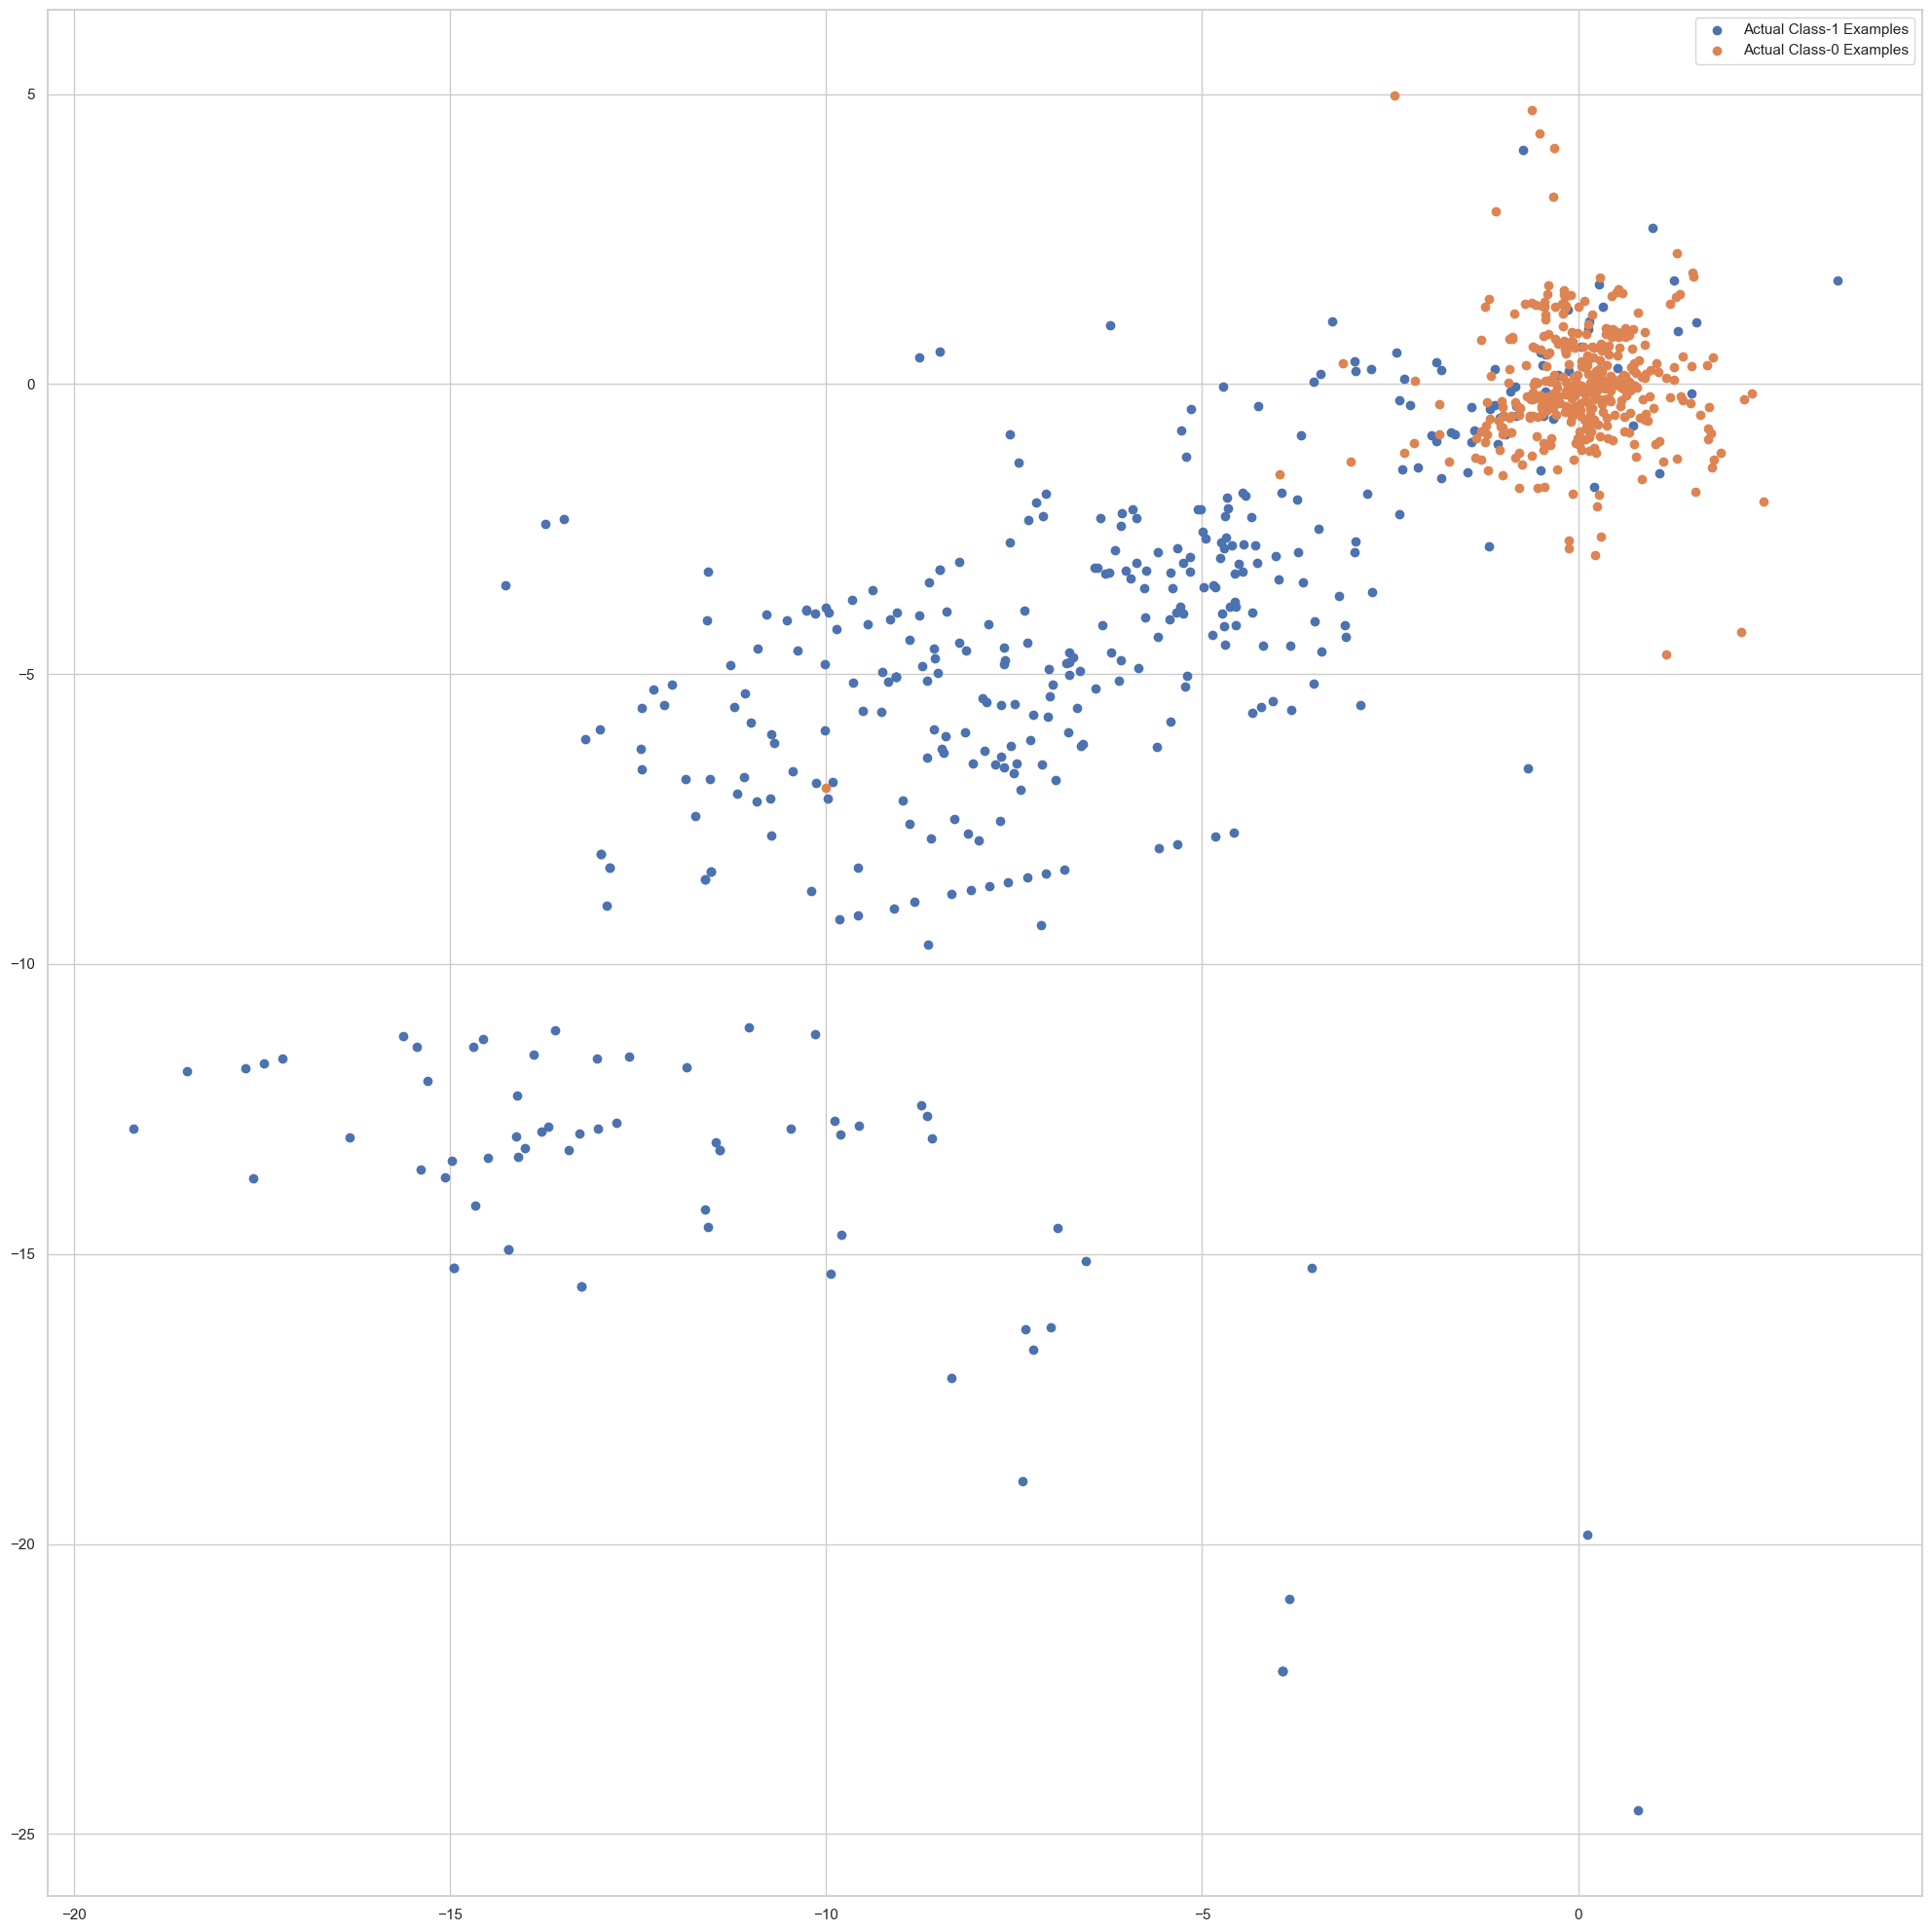

In [288]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.tight_layout()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [290]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.01, 0.1, 1, 2, 3]  #--> list of values
cv_num = [5, 10]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [291]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
ros = over_sampling.RandomOverSampler(random_state=42)
X_train_cv, y_train_cv = ros.fit_resample(X_train, y_train)
X_test_cv = X_test.to_numpy()
y_test_cv = y_test.to_numpy()

#perform hyperparameter tuning
model = linear_model.LogisticRegression(random_state=0, class_weight='balanced')
model.fit(X_train_cv, y_train_cv)
y_pred = model.predict(X_test_cv)
print(classification_report(y_test_cv, y_pred))

#print the evaluation result by choosing a evaluation metric
print("Precision: ", precision_score(y_test_cv, y_pred))
print("Recall: ", recall_score(y_test_cv, y_pred))
print("PRAUC Score: ", average_precision_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters
print("The optimum value of hyperparameters are: ", model.get_params())


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Precision:  0.0628053035589672
Recall:  0.9183673469387755
PRAUC Score:  0.05781878450999737
The optimum value of hyperparameters are:  {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

InvalidIndexError: (slice(None, 394, None), 0)

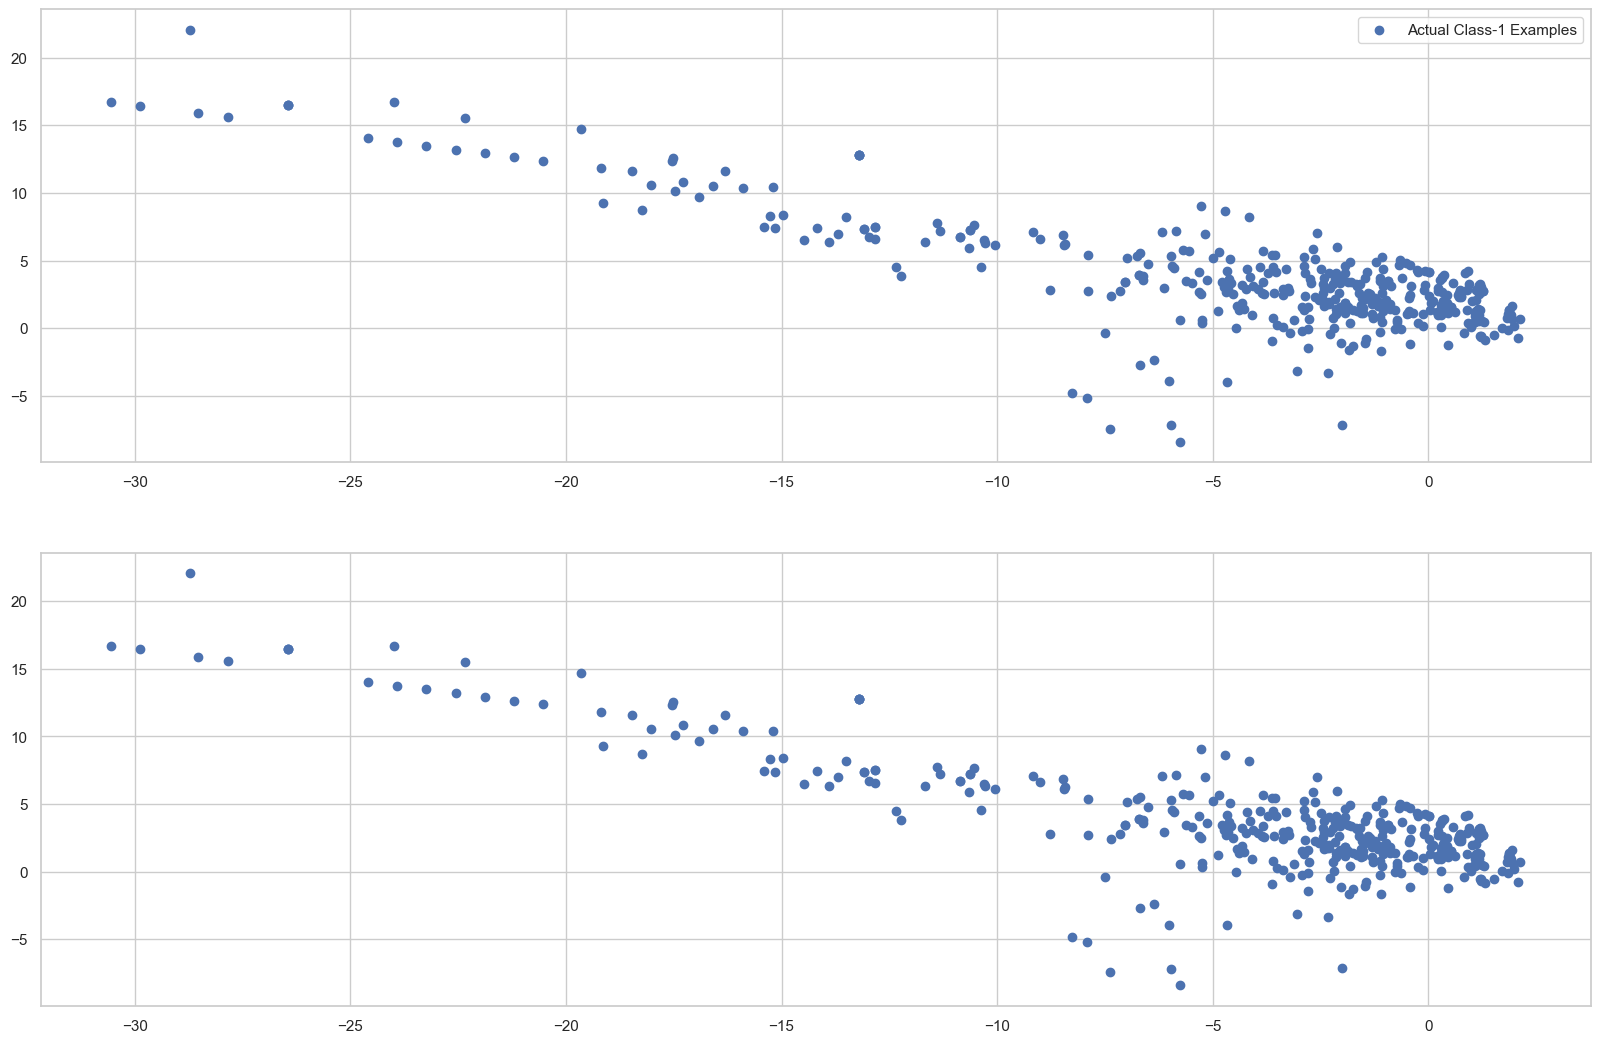

In [292]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)